### Imports

In [1]:
from torchvision.datasets import Cityscapes
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F


### Loading and splitting the Dataset

In [2]:
# Load the training set
train_dataset = Cityscapes('cityscapes/', split='train', mode='fine', target_type='semantic')

# Load the validation set
val_dataset = Cityscapes('cityscapes/', split='val', mode='fine', target_type='semantic')

# Load the test set
test_dataset = Cityscapes('cityscapes/', split='test', mode='fine', target_type='semantic')


### Exploring the Dataset

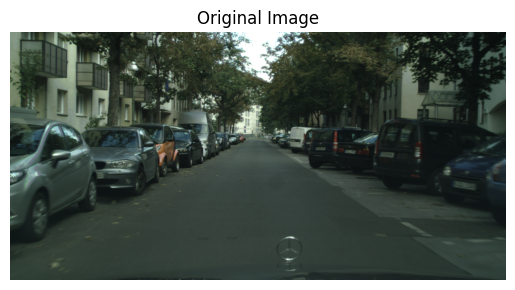

In [3]:
# showing an example image from one of the splitted datasets
def show_test_sample(dataset, index=0):
    image, _ = dataset[index]
    plt.imshow(image)
    plt.title(f'Original Image')
    plt.axis('off')
    plt.show()

show_test_sample(test_dataset, 5)

In [4]:
# image resolution
print(f"Image Resolution: {test_dataset[0][0].size}")

# number of pictures per split
num_train_images = len(train_dataset)
num_val_images = len(val_dataset)
num_test_images = len(test_dataset)

print(f'Number of training images: {num_train_images}')
print(f'Number of validation images: {num_val_images}')
print(f'Number of test images: {num_test_images}')

Image Resolution: (2048, 1024)
Number of training images: 2975
Number of validation images: 500
Number of test images: 1525


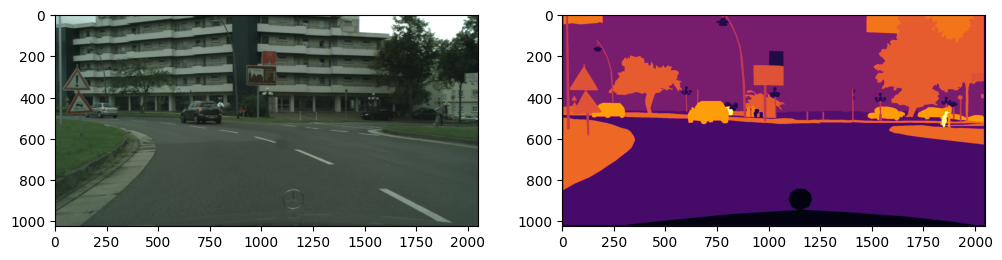

In [5]:
fig,ax=plt.subplots(ncols=2,figsize=(12,8))
ax[0].imshow(train_dataset[0][0])
ax[1].imshow(train_dataset[0][1],cmap='inferno')

Using the label-list from:
https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py

In [6]:
"""
labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]
"""
void_classes = [0, 1, 2, 3, 4, 5, 6, 9, 10, 14, 15, 16, 18, 29, 30, -1]
# 0 is to stay for all void classes

class_ids = range(34)
class_ids = [id for id in class_ids if id not in void_classes]

class_map = dict(zip(class_ids, range(len(class_ids))))
n = len(class_ids)
class_map[255] = 0
class_map


{7: 0,
 8: 1,
 11: 2,
 12: 3,
 13: 4,
 17: 5,
 19: 6,
 20: 7,
 21: 8,
 22: 9,
 23: 10,
 24: 11,
 25: 12,
 26: 13,
 27: 14,
 28: 15,
 31: 16,
 32: 17,
 33: 18,
 255: 0}

In [7]:
def segmentation_map(map):
    for c in void_classes:
        map[c] = 255
    for c in class_ids:
        map[c] = class_map[c]
    return map

In [8]:
print(train_dataset[0][1])

<PIL.PngImagePlugin.PngImageFile image mode=L size=2048x1024 at 0x1BC000582D0>


## U-Net

In [9]:
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.encoder1 = self.conv_block(in_channels, 64)
        self.encoder2 = self.conv_block(64, 128)
        self.encoder3 = self.conv_block(128, 256)
        self.encoder4 = self.conv_block(256, 512)
        
        self.middle = self.conv_block(512, 1024)
        
        self.upconv4 = self.upconv_block(1024, 512)
        self.upconv3 = self.upconv_block(512, 256)
        self.upconv2 = self.upconv_block(256, 128)
        self.upconv1 = self.upconv_block(128, 64)
        
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)
    
    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )
    
    def upconv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        # Encoder
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(F.max_pool2d(enc1, 2))
        enc3 = self.encoder3(F.max_pool2d(enc2, 2))
        enc4 = self.encoder4(F.max_pool2d(enc3, 2))
        
        # Middle
        middle = self.middle(F.max_pool2d(enc4, 2))
        
        # Decoder
        dec4 = self.upconv4(middle)
        dec4 = torch.cat([dec4, enc4], dim=1)
        dec4 = self.conv_block(1024, 512)(dec4)
        
        dec3 = self.upconv3(dec4)
        dec3 = torch.cat([dec3, enc3], dim=1)
        dec3 = self.conv_block(512, 256)(dec3)
        
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat([dec2, enc2], dim=1)
        dec2 = self.conv_block(256, 128)(dec2)
        
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat([dec1, enc1], dim=1)
        dec1 = self.conv_block(128, 64)(dec1)
        
        return self.final_conv(dec1)

In [10]:
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.transforms.functional as TF
from PIL import Image

class CityscapesWithTransform(Cityscapes):
    def __init__(self, root, split, mode, target_type, transform=None, target_transform=None):
        super().__init__(root, split=split, mode=mode, target_type=target_type)
        self.transform = transform
        self.target_transform = target_transform

    def __getitem__(self, index):
        img, target = super().__getitem__(index)
        
        if self.transform is not None:
            img = self.transform(img)
        
        if self.target_transform is not None:
            target = self.target_transform(target)
        
        return img, target

# Define the transformations for the dataset
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 256x256
    transforms.ToTensor(),  # Convert images to tensors
])

label_transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize labels to 256x256
    transforms.ToTensor(),  # Convert labels to tensors
])


train_dataset_unet = Cityscapes('cityscapes/', split='train', mode='fine', target_type='semantic', transform=image_transform, target_transform=label_transform)
val_dataset_unet = Cityscapes('cityscapes/', split='val', mode='fine', target_type='semantic', transform=image_transform, target_transform=label_transform)

train_dataset_subset = torch.utils.data.Subset(train_dataset_unet, range(100))
val_dataset_subset = torch.utils.data.Subset(val_dataset_unet, range(50))

# Create DataLoaders with smaller batch size if needed
train_loader = DataLoader(train_dataset_subset, batch_size=1, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset_subset, batch_size=1, shuffle=False, num_workers=4)


torch.Size([1, 3, 256, 256])
torch.Size([1, 1, 256, 256])


In [12]:
import torch.optim as optim
import torch.nn.functional as F
import time

# Instantiate model, loss function, and optimizer
model = UNet(in_channels=3, out_channels=19)  # 19 classes for Cityscapes

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop
def train_epoch(model, dataloader, criterion, optimizer):
    model.train()
    running_loss = 0.0

    start_time = time.time()
    
    try:
        for (images, targets) in (dataloader):

            targets = targets.squeeze(1)
            targets = targets.long()
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
    except Exception as e:
        print(f"An error occurred: {e}")
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    epoch_loss = running_loss / len(dataloader)

    return epoch_loss, elapsed_time

# Training
num_epochs = 10
for epoch in range(num_epochs):
    train_loss, time_elapsed = train_epoch(model, train_loader, criterion, optimizer)
    print(f'Epoch {epoch+1}/{num_epochs}, Time Elapsed: {time_elapsed:.2f} seconds, Loss: {train_loss:.4f}')


Epoch 1/10, Time Elapsed: 759.82 seconds, Loss: 2.9296
Epoch 2/10, Time Elapsed: 776.67 seconds, Loss: 2.9007
Epoch 3/10, Time Elapsed: 773.05 seconds, Loss: 2.8685
Epoch 4/10, Time Elapsed: 762.67 seconds, Loss: 2.7623
Epoch 5/10, Time Elapsed: 761.00 seconds, Loss: 2.2890
Epoch 6/10, Time Elapsed: 761.54 seconds, Loss: 1.1649
Epoch 7/10, Time Elapsed: 761.41 seconds, Loss: 0.0011
Epoch 8/10, Time Elapsed: 762.68 seconds, Loss: 0.0000
Epoch 9/10, Time Elapsed: 757.39 seconds, Loss: 0.0000
Epoch 10/10, Time Elapsed: 770.82 seconds, Loss: 0.0000


### Checking Model Performance

In [18]:
from torchmetrics import JaccardIndex

# Initialize the MeanIoU metric
num_classes = 19  # Number of classes for the Cityscapes dataset
miou_metric = JaccardIndex(task= 'multiclass', num_classes=19)

def validate_epoch(model, dataloader, criterion, miou_metric):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    miou_metric.reset()  # Reset the metric for each epoch

    with torch.no_grad():  # No need to track gradients
        for (images, targets) in dataloader:
            targets = targets.squeeze(1)
            targets = targets.long()
            
            outputs = model(images)
            loss = criterion(outputs, targets)
            running_loss += loss.item()

            # Update the metric with current batch
            preds = torch.argmax(outputs, dim=1)
            miou_metric.update(preds, targets)
    
    epoch_loss = running_loss / len(dataloader)
    epoch_miou = miou_metric.compute().item()
    return epoch_loss, epoch_miou


# Against Validation (to be implemented during training)
val_loss, val_acc = validate_epoch(model, val_loader, criterion, miou_metric)
print(val_loss)
print(val_acc)
# Against test subset (Final Accuracy)


1.9569560191670493e-09
1.0
